Image in greyscale

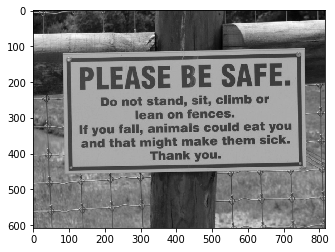

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

imgName = 'imgs/img_883.jpg'

img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE);
plt.imshow(img, cmap=plt.cm.gray);

Image blurred

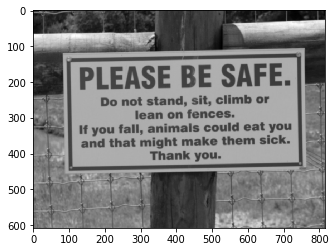

In [2]:
img = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img, cmap=plt.cm.gray);

Image binarized

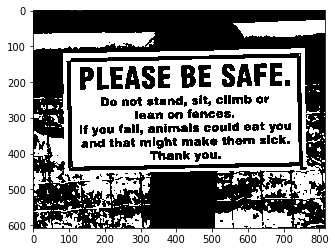

In [3]:
ret, threshImg = cv2.threshold(img, 127, 255, 0)
plt.imshow(threshImg, cmap=plt.cm.gray);

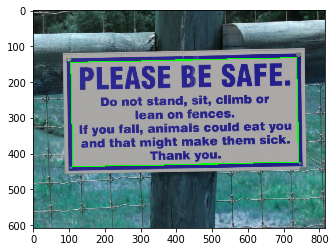

In [8]:
contours, hierarchy = cv2.findContours(threshImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    perimeter = cv2.arcLength(c, True)
    area = cv2.contourArea(c)
    approx = cv2.approxPolyDP(c, 0.005 * perimeter, True)
    
    if len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        if w*h > 50000:
            cv2.drawContours(regularImg, [c], -1, (0, 255, 0), 2)

cv2.imwrite('output.jpg', regularImg)

plt.imshow(regularImg, cmap='gray');